## E-Commerce Store Analysis

#### Usually e-commerce datasets are proprietary and thus hard to find among publicly available data. However, this dataset has been downloaded from the UCI Machine Learning Repository.

#### This dataset contains actual transactions for a UK based e-commerce store from 2010 and 2011. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers. Our aim is to analyze the transactions made from the dataset. From the analysis, we will develop a model to segment customers into groups, based on their common characteristics and past purchase behavior.

In [595]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

### Importing Dataset

In [596]:
df = pd.read_csv("data.csv",  engine ='python')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


##### From the dataset above, we can see the information for each transaction in the store. For example, the customer with ID 17850 from United Kingdom has a single order with the InvoiceNo. 536365. The customer ordered several products with different stockcodes, descriptions and quantities, all on the same day (12/1/2010).

### Data Pre-processing

In [597]:
df.shape

(541909, 8)

In [598]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

##### Data Info

In [599]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [600]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

##### We can see that CustomerID is of float data type and thus have to change it to int type. Same goes for InvoiceDate as well. We will change these data types later.

##### Changing Data Type

In [601]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [602]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [603]:
df['Description'] = df.Description.str.lower()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


##### Renaming Column

In [604]:
df.rename(columns={'InvoiceDate': 'InvoiceDateTime'})

,InvoiceNo,StockCode,Description,Quantity,InvoiceDateTime,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680.0,France


##### Treating Null Values

Text(0.5, 1.0, 'Missing values for each column')

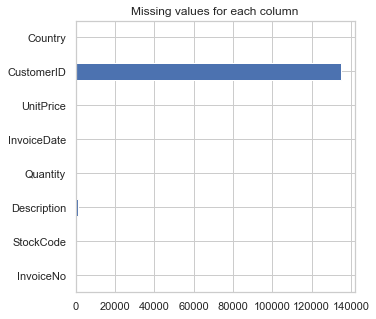

In [605]:
plt.figure(figsize=(5, 5))
df.isnull().sum().plot.barh()
plt.title("Missing values for each column")

In [606]:
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
Country             0
UnitPrice           0
InvoiceDate         0
Quantity            0
StockCode           0
InvoiceNo           0
dtype: int64

##### Almost 20 % of the customers and 0.3 % of descriptions are unknown!

##### As we can't replace the missing values since we want to classify the customers, let us drop the rows with missing values of Customer ID and Description. Since our dataset (of size 5L+ values) is relatively larger than this value, we can drop these values as the dataset will still be large enough to provide as much randomization as possible(real world scenario).

In [607]:
ndf = df.dropna()

In [608]:
ndf.isnull().sum().sort_values(ascending=False)

Country        0
CustomerID     0
UnitPrice      0
InvoiceDate    0
Quantity       0
Description    0
StockCode      0
InvoiceNo      0
dtype: int64

In [609]:
ndf['CustomerID'] = ndf['CustomerID'].astype('int64')

C:\Users\abcd\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [610]:
ndf.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
dtype: object

#### Data Statistics

In [611]:
ndf.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


##### We can see that Quantity has negative values and UnitPrice has values with 0. This cannot be possible. Let us remove these values.

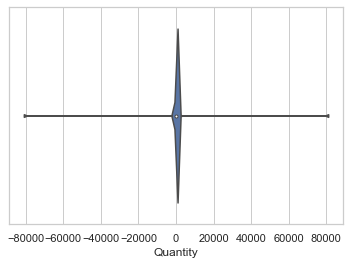

In [612]:
sns.set(style='whitegrid')
ax=sns.violinplot(x=ndf['Quantity'])

##### Delete the negative values of Quantity

In [613]:
ndf = ndf[ndf.Quantity > 0]

In [614]:
ndf.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


##### Delete the 0 values of Unit Price

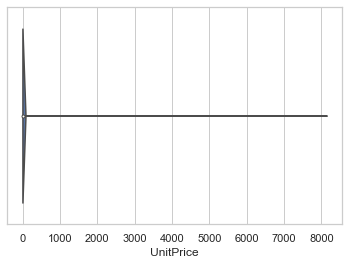

In [615]:
ax=sns.violinplot(x=ndf['UnitPrice'])

In [616]:
ndf.loc[ndf.UnitPrice == 0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany
33576,539263,22580,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom
40089,539722,22423,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE
47068,540372,22090,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom
47070,540372,22553,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom


In [617]:
ndf = ndf[ndf.UnitPrice > 0]

In [618]:
ndf.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


#### Outliers in Quantity and UnitPrice

##### From the above Violin plots we can say that there are Outliers in Quantity and UnitPrice

###### Using inter-quartile range method to remove outliers in Quantity and UnitPrice

In [619]:
Q1 = ndf.UnitPrice.quantile(0.25)
Q3 = ndf.UnitPrice.quantile(0.75)
IQR = Q3 - Q1
udf = ndf[~((ndf['UnitPrice'] < (Q1 - 1.5 * IQR)) | (ndf['UnitPrice'] > (Q3 + 1.5 * IQR)))]

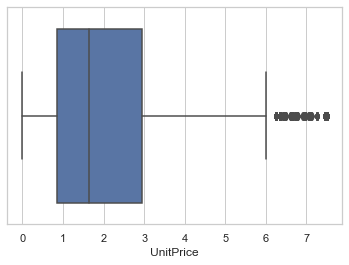

In [620]:
ax = sns.boxplot(x=udf['UnitPrice'])

In [621]:
Q1 = udf.Quantity.quantile(0.25)
Q3 = udf.Quantity.quantile(0.75)
IQR = Q3 - Q1
data = udf[~((udf['Quantity'] < (Q1 - 1.5 * IQR)) | (udf['Quantity'] > (Q3 + 1.5 * IQR)))]

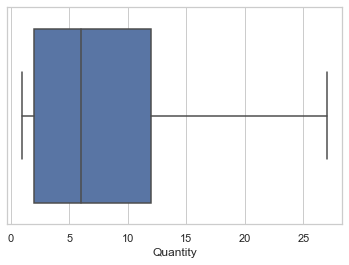

In [622]:
ax = sns.boxplot(x=data['Quantity'])

#### Removing Duplicate Entries

In [623]:
data.duplicated().sum()

4917

In [624]:
data.drop_duplicates(inplace = True)

C:\Users\abcd\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [625]:
data.duplicated().sum()

0

#### Time period

In [626]:
print("Transactions starts from the datetime", data.InvoiceDate.min())
print("Transactions ends with the datetime", data.InvoiceDate.max())

Transactions starts from the datetime 2010-12-01 08:26:00
Transactions ends with the datetime 2011-12-09 12:50:00


##### New Column - amount_spent

##### amount_spent column is to know the total cost of each product's transaction

In [627]:
data['amount_spent'] = data['Quantity'] * data['UnitPrice']
data.head()

C:\Users\abcd\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


##### Detecting outliers with in amount_spent using Scatterplot

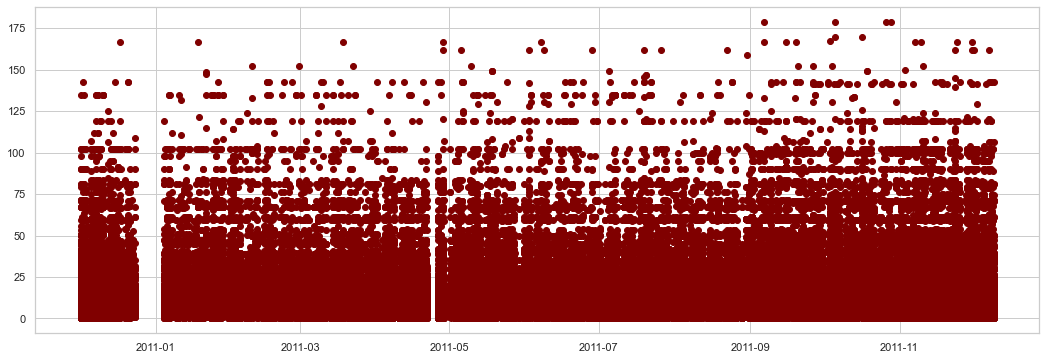

In [628]:
plt.figure(figsize=(18,6))
plt.scatter(x=data.InvoiceDate, y=data['amount_spent'], color='maroon')

(array([14975., 15034., 15095., 15156., 15218., 15279.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

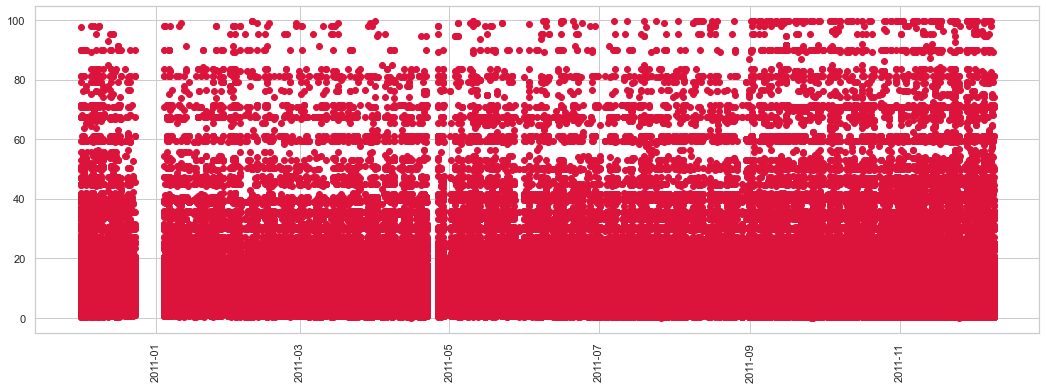

In [629]:
temp_data = data[data['amount_spent'] < 100]
plt.figure(figsize=(18,6))
plt.scatter(x=temp_data.InvoiceDate, y=temp_data['amount_spent'], color='crimson')
plt.xticks(rotation=90)

(array([14975., 15034., 15095., 15156., 15218., 15279.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

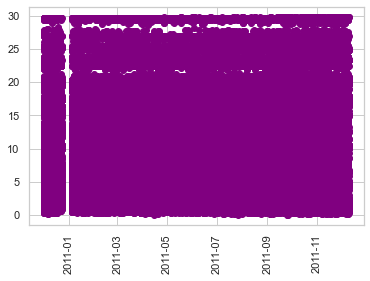

In [630]:
final_df = temp_data[temp_data['amount_spent'] < 30]
plt.scatter(x=final_df.InvoiceDate, y=final_df['amount_spent'], color='purple')
plt.xticks(rotation=90)

##### We have thus removed the outliers in amount_spent by removing values more than Rs.30

In [631]:
final_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


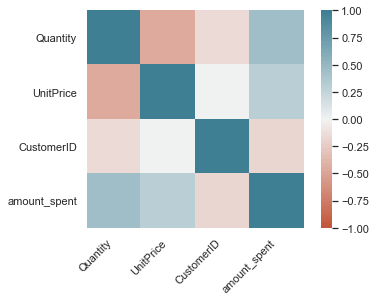

In [632]:
corr = final_df.corr()
ax = sns.heatmap(corr,vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right');

##### From the above correlation plot, we decide to go ahead with all the dataset attributes as most of them are correlated to each other (except Customer ID to UnitPrice) and can play a significant part in the analysis.

#### Which items were bought more often?

In [633]:
final_df['Description'].value_counts().head()

white hanging heart t-light holder    1322
jumbo bag red retrospot               1139
lunch bag red retrospot               1081
set of 3 cake tins pantry design      1038
assorted colour bird ornament         1002
Name: Description, dtype: int64

C:\Users\abcd\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'white hanging heart t-light holder'),
  Text(1, 0, 'jumbo bag red retrospot'),
  Text(2, 0, 'lunch bag red retrospot'),
  Text(3, 0, 'set of 3 cake tins pantry design '),
  Text(4, 0, 'assorted colour bird ornament'),
  Text(5, 0, 'pack of 72 retrospot cake cases'),
  Text(6, 0, 'lunch bag  black skull.'),
  Text(7, 0, 'party bunting'),
  Text(8, 0, 'rex cash+carry jumbo shopper'),
  Text(9, 0, 'lunch bag spaceboy design '),
  Text(10, 0, 'lunch bag cars blue'),
  Text(11, 0, 'heart of wicker small'),
  Text(12, 0, 'lunch bag pink polkadot'),
  Text(13, 0, 'spotty bunting'),
  Text(14, 0, 'lunch bag suki design ')])

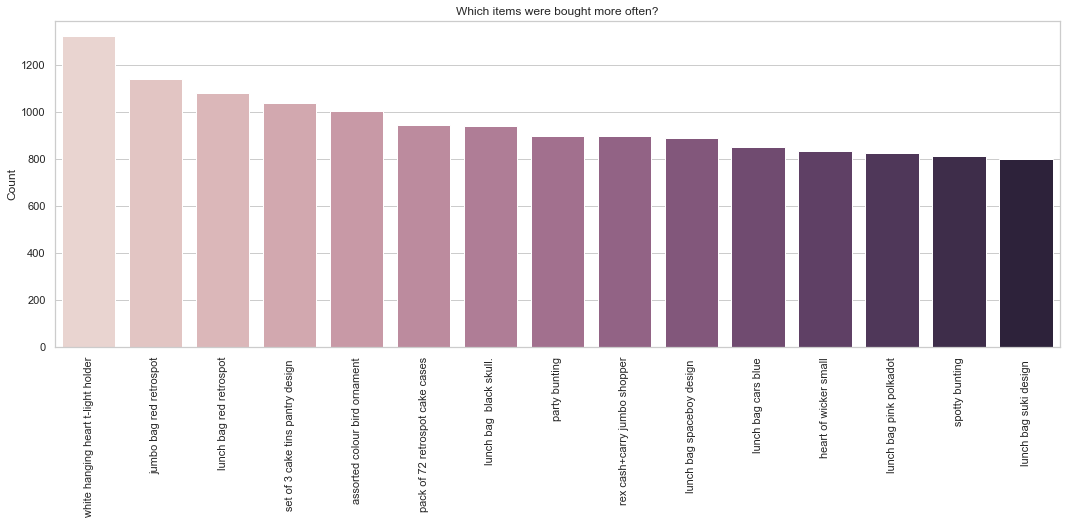

In [634]:
item_counts = final_df['Description'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(item_counts.index, item_counts.values, palette=sns.cubehelix_palette(15))
plt.ylabel("Count")
plt.title("Which items were bought more often?");
plt.xticks(rotation=90)

##### From the above histogram, we can infer that a white hanging heart t-light holder was bought the most number of times (1200+), followed by a jumbo bag (1000+)

#### Country-wise Sales 

Text(0, 0.5, 'Count')

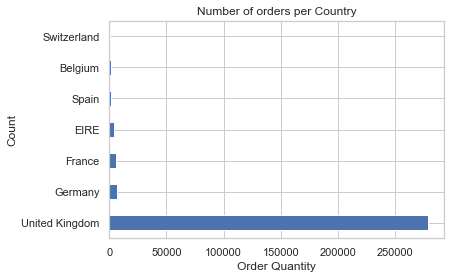

In [635]:
final_df.Country.value_counts()[0:7].plot(kind='barh');
plt.title('Number of orders per Country')
plt.xlabel('Order Quantity')
plt.ylabel('Count')

##### It can be seen from the graph that around 90% of the customers exist in United Kingdom only followed by Germany and France. Hence, the company should focus on the United Kingdom for it marketing and other strategies.

#### Customer Segmentation using RFM (Recency, Frequency, Monetary) Analysis

##### RFM criterion is used for selecting the most significant customers. We select the customers that are most recent (R), frequent (F), and add a larger monetary value (M) in every transaction.

#### 1. Recency

In [636]:
#new dataframe to keep track of RFM scores
customer = pd.DataFrame(final_df['CustomerID'].unique())
customer.columns = ['CustomerID']

In [637]:
# new dataframe based on latest Invoice date
recency = final_df.groupby('CustomerID').InvoiceDate.max().reset_index()
recency.columns = ['CustomerID','LastPurchaseDate']

# observation point is the last invoice date in the dataset
LastInvoiceDate = recency['LastPurchaseDate'].max()

# Generating Recency in days by subtracting the Last Purchase date for each customer from the Last Invoice Date
recency['Recency'] = (LastInvoiceDate - recency['LastPurchaseDate']).dt.days

In [638]:
customer = pd.merge(customer, recency[['CustomerID','Recency']], on='CustomerID')
customer.head()

,CustomerID,Recency
0,17850,371
1,13047,31
2,12583,2
3,14688,7
4,15311,0


##### Inference: This data helps us to understand how likely it is for a customer to return for a purchase.

Text(0.5, 1.0, 'Recency Histogram')

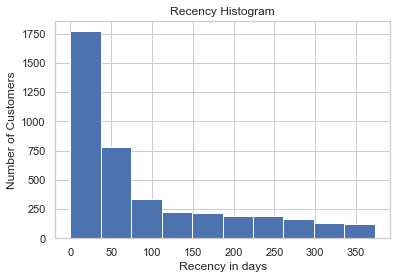

In [639]:
customer.Recency.plot.hist()
plt.xlabel("Recency in days")
plt.ylabel("Number of Customers")
plt.title("Recency Histogram")

#### 2. Frequency

In [640]:
# number of invoices per CustomerID and store in new frequency Dataframe
frequency = final_df.groupby('CustomerID').InvoiceDate.count().reset_index()
frequency.columns = ['CustomerID','Frequency']

customer = pd.merge(customer, frequency, on='CustomerID')
customer.head()

,CustomerID,Recency,Frequency
0,17850,371,262
1,13047,31,139
2,12583,2,134
3,14688,7,265
4,15311,0,1801


##### Inference: This data helps us to understand whether a customer is a frequent or a casual shopper(based on his/her frequency of shopping). A person who loves shopping will have a higher frequency than a casual shopper.

In [641]:
customer.Frequency.shape

(4119,)

Text(0.5, 1.0, 'Frequency Histogram')

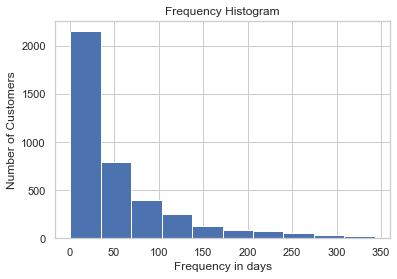

In [642]:
customer.Frequency.sort_values().head(4000).plot.hist()
plt.xlabel("Frequency in days")
plt.ylabel("Number of Customers")
plt.title("Frequency Histogram")

#### 3. Monetary (Revenue)

In [643]:
# Grouping revenue per Customer ID
revenue = final_df.groupby('CustomerID').amount_spent.sum().reset_index()

customer = pd.merge(customer, revenue, on='CustomerID')
customer.head()

,CustomerID,Recency,Frequency,amount_spent
0,17850,371,262,4054.24
1,13047,31,139,2275.98
2,12583,2,134,1971.08
3,14688,7,265,2576.75
4,15311,0,1801,10251.98


Text(0.5, 1.0, 'Revenue Histogram')

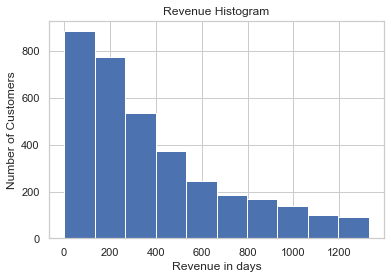

In [644]:
customer.amount_spent.sort_values().head(3500).plot.hist()
plt.xlabel("Revenue in days")
plt.ylabel("Number of Customers")
plt.title("Revenue Histogram")

### K-Means Clustering

In [645]:
# input features variable
X = customer.loc[:, 'Recency':'amount_spent']
X.head()

,Recency,Frequency,amount_spent
0,371,262,4054.24
1,31,139,2275.98
2,2,134,1971.08
3,7,265,2576.75
4,0,1801,10251.98


In [646]:
# Number of clusters - Initially based on the 3 Segments (Low, Mid, High)
k=3

In [647]:
# Scaling input using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xstd = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [648]:
# Run and train main K-means algorithm based on all input features
from sklearn.cluster import KMeans
model = KMeans(n_clusters=k, random_state=0)
model.fit(Xstd)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [649]:
# output cluster labels
cluster_labels = model.labels_
print("Assigned cluster labels: \n", cluster_labels)

Assigned cluster labels: 
 [1 0 0 ... 0 0 0]


In [650]:
# adding clusters to input features table
Xstd['clusters'] = cluster_labels
Xstd.head()

,Recency,Frequency,amount_spent,clusters
0,2.764980,0.967571,2.148806,1
1,-0.615419,0.332768,0.992302,0
2,-0.903747,0.306963,0.794008,0
3,-0.854036,0.983054,1.187910,0
4,-0.923632,8.910341,6.179552,0


#### Evaluation Metrics - Silhouette and Inertia scores

##### Silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1. As the value goes towards 1, the clusters are well apart from each other and clearly distinguished.

##### Inertia tells how far away the points within a cluster are. Therefore, we are aiming for a small inertia.

In [651]:
from sklearn import metrics
metrics.silhouette_score(Xstd, cluster_labels, metric='euclidean')

0.6055673031667524

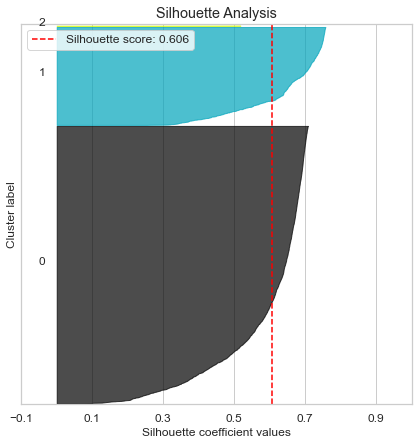

In [652]:
# Plotting Silhouette Score
import scikitplot as skplt
fig, ax = plt.subplots(figsize=(7, 7))
skplt.metrics.plot_silhouette(Xstd, cluster_labels, ax=ax)
plt.show()

##### The silhouette plot shows that the data is split into three clusters (0,1,2). Most of the points in the two clusters (0,1) have silhouette values of 0.3 or greater, indicating that the clusters are well separated. Also from the thickness of the silhouette plot the cluster size can be visualized. The silhouette plot for cluster 0, is bigger in size owing to the grouping of the 3 sub clusters into one big cluster. The silhouette plot for cluster 2, is barely visible owing to the fact that there are very little high value customers.

#### K-Means Optimization

In [653]:
inertias = []
ss = []

for k in range(2,11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(Xstd)
    inertias.append(kmeans.inertia_)
    ss.append(metrics.silhouette_score(Xstd, kmeans.labels_, metric='euclidean'))

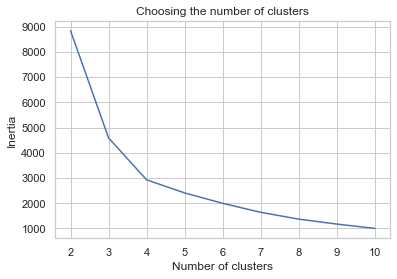

In [654]:
plt.plot(range(2, 11), inertias)
plt.title('Choosing the number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [655]:
inertias[4]

1996.7035937615733

#### We can infer that the inertia decreases significantly at K = 4

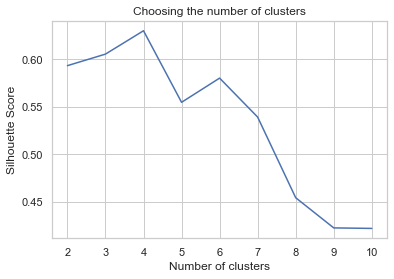

In [656]:
plt.plot(range(2, 11), ss)
plt.title('Choosing the number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [657]:
ss[4]

0.5802969240247023

##### We can infer that at K = 4 the silhouette score is the highest.
##### Thus based on both the scores, we arrive at the fact that K = 4 is the most optimal.

In [658]:
model = KMeans(n_clusters=4, random_state=0)
model.fit(Xstd)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [659]:
# output cluster labels
cluster_labels = model.labels_
print("Assigned cluster labels: \n", cluster_labels)

Assigned cluster labels: 
 [1 0 0 ... 0 0 0]


In [660]:
# adding clusters to input features table
Xstd['clusters'] = cluster_labels
Xstd.head()

,Recency,Frequency,amount_spent,clusters
0,2.764980,0.967571,2.148806,1
1,-0.615419,0.332768,0.992302,0
2,-0.903747,0.306963,0.794008,0
3,-0.854036,0.983054,1.187910,2
4,-0.923632,8.910341,6.179552,2


In [661]:
customer['Cluster'] = cluster_labels
customer.Cluster.unique()

array([1, 0, 2, 3])

In [662]:
customer['Profile'] = cluster_labels
customer['Profile'].replace({0: "Low Value", 1: "Mid Value", 2: "High Value", 3: "High Value"}, inplace = True)

In [663]:
customer.head()

,CustomerID,Recency,Frequency,amount_spent,Cluster,Profile
0,17850,371,262,4054.24,1,Mid Value
1,13047,31,139,2275.98,0,Low Value
2,12583,2,134,1971.08,0,Low Value
3,14688,7,265,2576.75,2,High Value
4,15311,0,1801,10251.98,2,High Value


Text(0.5, 1.0, 'Segments Summary')

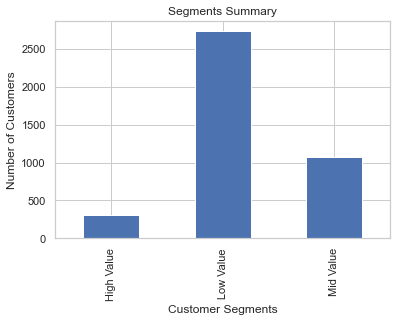

In [664]:
customer.groupby('Profile').Profile.count().plot.bar()
plt.xlabel("Customer Segments")
plt.ylabel("Number of Customers")
plt.title("Segments Summary")

##### From the above graph we can infer that most of the customers are low value customers and there are very few customers of high value.

##### Specific actions can be planned across the E-Commerce Store to address any potential issues.
##### High Value: Improve Retention of these customers as they are the most valuable asset
##### Mid Value: Increase Rention and Frequency and bring them closer to the brand and the product so eventually they become High Value
##### Low Value: Increase Frequency and understand if there are any potential issues around the product or service